In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ev_data = pd.read_csv(r"C:\Users\hp\Desktop\66634-ev-data\Electric_Vehicle_Population_Data.csv")

In [3]:
ev_data.head(2)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10


In [4]:
ev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177866 entries, 0 to 177865
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         177866 non-null  object 
 1   County                                             177861 non-null  object 
 2   City                                               177861 non-null  object 
 3   State                                              177866 non-null  object 
 4   Postal Code                                        177861 non-null  float64
 5   Model Year                                         177866 non-null  int64  
 6   Make                                               177866 non-null  object 
 7   Model                                              177866 non-null  object 
 8   Electric Vehicle Type                              177866 non-null  object

In [5]:
ev_data.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 389
DOL Vehicle ID                                         0
Vehicle Location                                       9
Electric Utility                                       5
2020 Census Tract                                      5
dtype: int64

In [6]:
ev_data = ev_data.dropna()

In [7]:
ev_data.isnull().sum()

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64

C:\Users\hp\AppData\Local\Temp\ipykernel_16300\941466834.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = ev_adoption_by_year.index, y = ev_adoption_by_year.values, palette="dark")


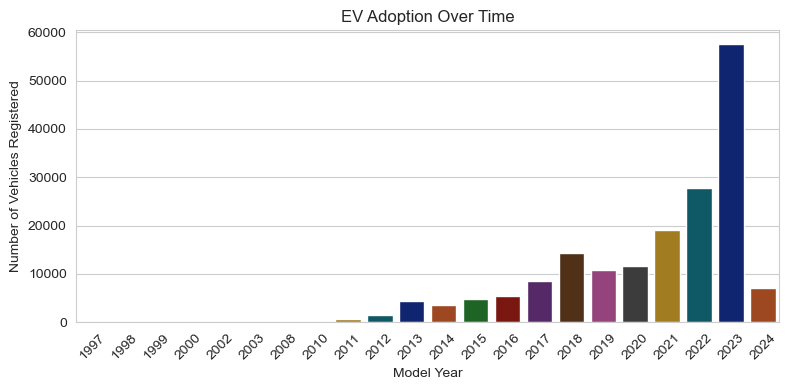

In [8]:
sns.set_style("whitegrid")
plt.figure(figsize=(8,4))
ev_adoption_by_year = ev_data["Model Year"].value_counts()
sns.barplot(x = ev_adoption_by_year.index, y = ev_adoption_by_year.values, palette="dark")
plt.title("EV Adoption Over Time")
plt.xlabel("Model Year")
plt.ylabel("Number of Vehicles Registered")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [9]:
ev_county_distribution = ev_data["County"].value_counts()

In [10]:
ev_county_distribution

County
King            92740
Snohomish       21001
Pierce          13782
Clark           10409
Thurston         6428
Kitsap           5840
Spokane          4586
Whatcom          4253
Benton           2147
Skagit           1910
Island           1882
Clallam          1058
Chelan           1047
Yakima            995
Jefferson         974
San Juan          942
Cowlitz           897
Mason             823
Lewis             739
Grays Harbor      625
Kittitas          623
Franklin          585
Grant             561
Walla Walla       437
Douglas           364
Whitman           334
Klickitat         284
Okanogan          263
Stevens           219
Pacific           198
Skamania          192
Asotin             73
Wahkiakum          60
Pend Oreille       55
Lincoln            49
Adams              48
Ferry              31
Columbia           16
Garfield            3
Name: count, dtype: int64

In [11]:
top_counties = ev_county_distribution.head(3).index

In [12]:
top_counties

Index(['King', 'Snohomish', 'Pierce'], dtype='object', name='County')

In [13]:
top_counties_data = ev_data[ev_data["County"].isin(top_counties)]

In [14]:
ev_city_distribution_top_counties = top_counties_data.groupby(["County", "City"]).size().reset_index(name = "Number of Vehicles")

In [15]:
ev_city_distribution_top_counties.head(3)

,County,City,Number of Vehicles
0,King,Algona,36
1,King,Auburn,1664
2,King,Baring,3


In [16]:
ev_city_distribution_top_counties = ev_city_distribution_top_counties.sort_values(
    ["County", "Number of Vehicles"], ascending=[True, False]
)
top_cities = ev_city_distribution_top_counties.groupby("County").head(3)

In [17]:
top_cities

,County,City,Number of Vehicles
37,King,Seattle,29447
4,King,Bellevue,8930
33,King,Redmond,6478
84,Pierce,Tacoma,3722
61,Pierce,Gig Harbor,1948
76,Pierce,Puyallup,1315
90,Snohomish,Bothell,4663
99,Snohomish,Lynnwood,2726
94,Snohomish,Everett,2475


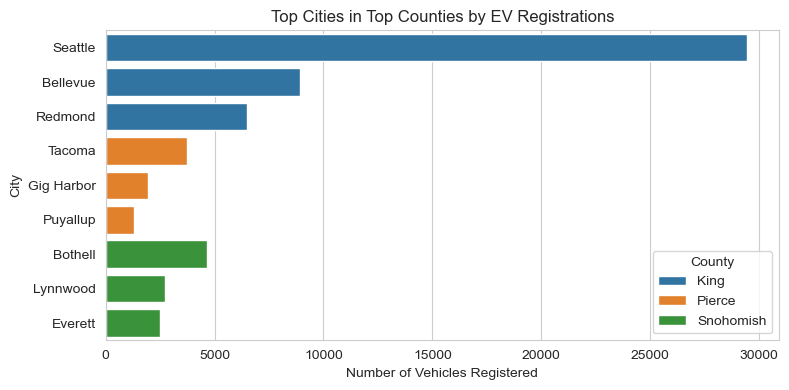

In [18]:
plt.figure(figsize=(8,4))
sns.barplot(x = "Number of Vehicles", y = "City", hue = "County", data = top_cities)
plt.title("Top Cities in Top Counties by EV Registrations")
plt.xlabel("Number of Vehicles Registered")
plt.ylabel("City")
plt.legend(title = "County")
plt.tight_layout()
plt.show()

In [19]:
ev_data.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [20]:
ev_type_distribution = ev_data["Electric Vehicle Type"].value_counts()

In [21]:
ev_type_distribution

Electric Vehicle Type
Battery Electric Vehicle (BEV)            138947
Plug-in Hybrid Electric Vehicle (PHEV)     38526
Name: count, dtype: int64

C:\Users\hp\AppData\Local\Temp\ipykernel_16300\1298659494.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ev_type_distribution.values, y=ev_type_distribution.index, palette="deep")


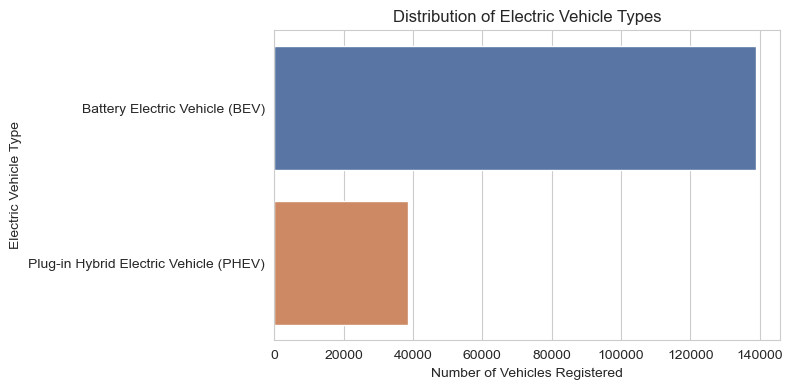

In [22]:
plt.figure(figsize=(8, 4))
sns.barplot(x=ev_type_distribution.values, y=ev_type_distribution.index, palette="deep")
plt.title('Distribution of Electric Vehicle Types')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Electric Vehicle Type')
plt.tight_layout()
plt.show()

In [23]:
ev_make_distribution = ev_data["Make"].value_counts().head(10)

In [24]:
ev_make_distribution

Make
TESLA         79471
NISSAN        13984
CHEVROLET     13651
FORD           9177
BMW            7556
KIA            7423
TOYOTA         6254
VOLKSWAGEN     4993
JEEP           4468
HYUNDAI        4398
Name: count, dtype: int64

C:\Users\hp\AppData\Local\Temp\ipykernel_16300\2683130367.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ev_make_distribution.values, y=ev_make_distribution.index, palette="cubehelix")


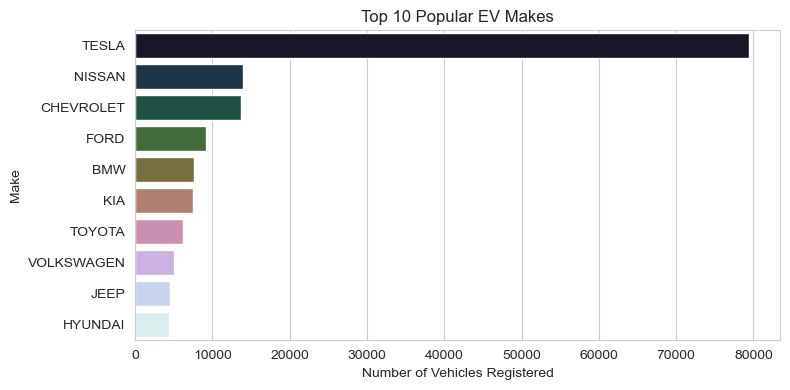

In [25]:
plt.figure(figsize=(8, 4))
sns.barplot(x=ev_make_distribution.values, y=ev_make_distribution.index, palette="cubehelix")
plt.title('Top 10 Popular EV Makes')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Make')
plt.tight_layout()
plt.show()

In [26]:
top_3_make = ev_make_distribution.head(3).index

In [27]:
top_3_make

Index(['TESLA', 'NISSAN', 'CHEVROLET'], dtype='object', name='Make')

In [28]:
top_makes_data = ev_data[ev_data["Make"].isin(top_3_make)]

In [29]:
top_makes_data

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027.0,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177859,1N4BZ1DV7M,King,Redmond,WA,98053.0,2021,NISSAN,LEAF,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,45.0,172798951,POINT (-122.0222799 47.6958998),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
177860,1G1FX6S00J,Clallam,Sequim,WA,98382.0,2018,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,24.0,347972607,POINT (-123.105015 48.08125),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.300900e+10
177861,7SAYGDEE3N,Pierce,Bonney Lake,WA,98391.0,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,31.0,195224452,POINT (-122.183805 47.18062),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.305307e+10
177863,5YJYGDEE6M,Grant,Quincy,WA,98848.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,13.0,168797219,POINT (-119.8493873 47.2339933),PUD NO 2 OF GRANT COUNTY,5.302501e+10


In [30]:
ev_model_distribution_top_makes = top_makes_data.groupby(["Make", "Model"]).size().reset_index(name = "Number of Vehicles")

In [31]:
ev_model_distribution_top_makes = ev_model_distribution_top_makes.sort_values(
    ["Make", "Number of Vehicles"], ascending=[True, False]
)

In [32]:
top_models = ev_model_distribution_top_makes.groupby("Make").head(4)

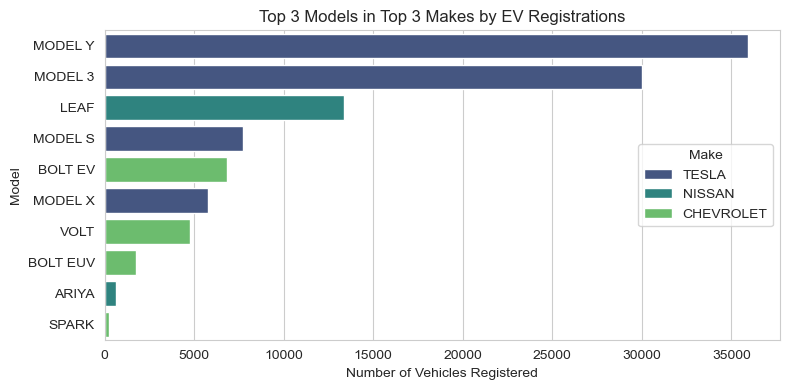

In [33]:
plt.figure(figsize=(8, 4))
sns.barplot(
    x="Number of Vehicles",
    y="Model",
    hue="Make",
    data=top_models.sort_values("Number of Vehicles", ascending=False),
    palette="viridis"
)
plt.title("Top 3 Models in Top 3 Makes by EV Registrations")
plt.xlabel("Number of Vehicles Registered")
plt.ylabel("Model")
plt.legend(title="Make", loc="center right")
plt.tight_layout()
plt.show()

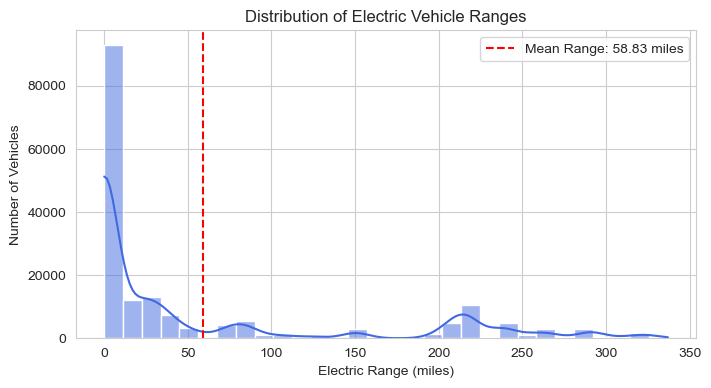

In [34]:
plt.figure(figsize=(8, 4))
sns.histplot(ev_data['Electric Range'], bins=30, kde=True, color='royalblue')
plt.title('Distribution of Electric Vehicle Ranges')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Number of Vehicles')
plt.axvline(ev_data['Electric Range'].mean(), color='red', linestyle='--', label=f'Mean Range: {ev_data["Electric Range"].mean():.2f} miles')
plt.legend()
plt.show()

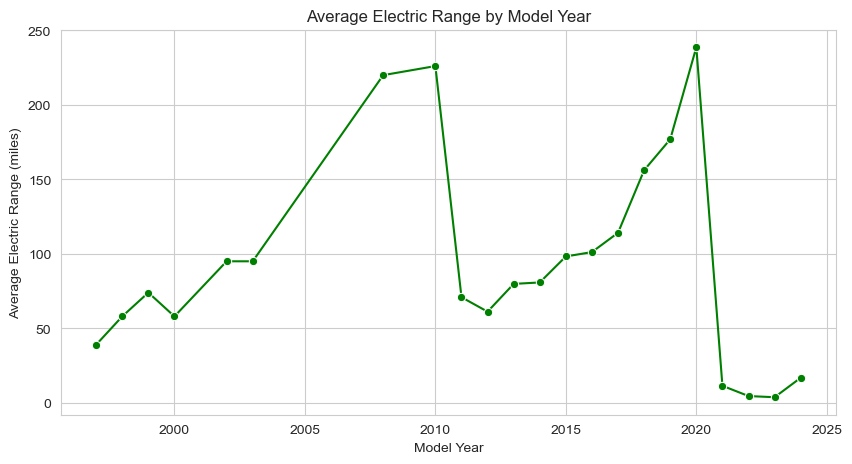

In [35]:
average_range_by_year = ev_data.groupby('Model Year')['Electric Range'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(x='Model Year', y='Electric Range', data=average_range_by_year, marker='o', color='green')
plt.title('Average Electric Range by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average Electric Range (miles)')
plt.grid(True)
plt.show()

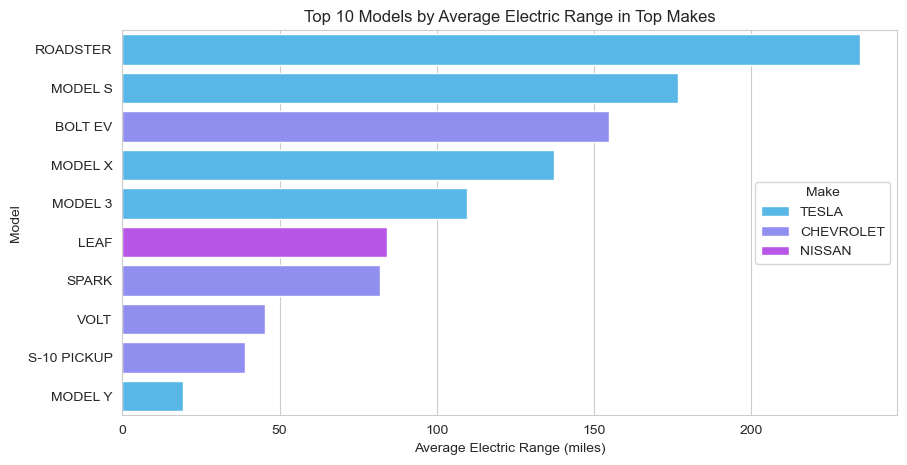

In [36]:
average_range_by_model = top_makes_data.groupby(['Make', 'Model'])['Electric Range'].mean().sort_values(ascending=False).reset_index()
top_range_models = average_range_by_model.head(10)
plt.figure(figsize=(10, 5))
barplot = sns.barplot(x='Electric Range', y='Model', hue='Make', data=top_range_models, palette="cool")
plt.title('Top 10 Models by Average Electric Range in Top Makes')
plt.xlabel('Average Electric Range (miles)')
plt.ylabel('Model')
plt.legend(title='Make', loc='center right')
plt.show()

In [37]:
ev_registration_counts = ev_data["Model Year"].value_counts().sort_index()

In [38]:
ev_registration_counts

Model Year
1997        1
1998        1
1999        5
2000        7
2002        2
2003        1
2008       19
2010       23
2011      775
2012     1614
2013     4399
2014     3496
2015     4826
2016     5469
2017     8534
2018    14286
2019    10913
2020    11740
2021    19063
2022    27708
2023    57519
2024     7072
Name: count, dtype: int64

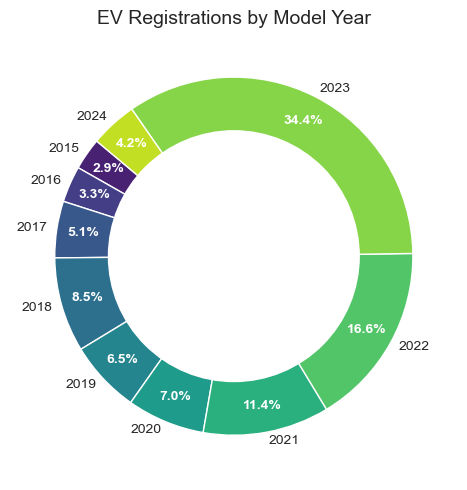

In [39]:
ev_df = ev_registration_counts.reset_index()
ev_df.columns = ['Model Year', 'Count']
ev_df = ev_df.tail(10)  # last 10 years

plt.figure(figsize=(5, 5))
wedges, texts, autotexts = plt.pie(
    ev_df['Count'],
    labels=ev_df['Model Year'],
    autopct='%1.1f%%',
    startangle=140,
    pctdistance=0.85,   
    labeldistance=1.05,  
    colors=sns.color_palette("viridis", len(ev_df))
)

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.setp(autotexts, size=10, weight="bold", color="white")
plt.setp(texts, size=10)
plt.title("EV Registrations by Model Year", fontsize=14)
plt.tight_layout()
plt.show()

In [40]:
from scipy.optimize import curve_fit

filtered_years = ev_registration_counts[ev_registration_counts.index <= 2023]
def exp_growth(x, a, b):
    return a * np.exp(b * x)

x_data = filtered_years.index - filtered_years.index.min()
y_data = filtered_years.values
params, covariance = curve_fit(exp_growth, x_data, y_data)

forecast_years = np.arange(2024, 2024 + 6) - filtered_years.index.min()
forecasted_values = exp_growth(forecast_years, *params)
forecasted_evs = dict(zip(forecast_years + filtered_years.index.min(), forecasted_values))
forecasted_evs

{2024: 79079.20808938889,
 2025: 119653.96274428742,
 2026: 181047.22020265696,
 2027: 273940.74706208805,
 2028: 414497.01805382164,
 2029: 627171.3128407666}

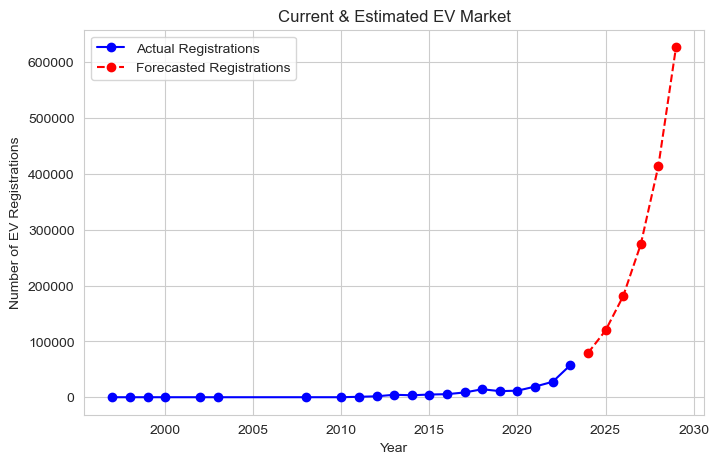

In [43]:
years = np.arange(filtered_years.index.min(), 2029 + 1)
actual_years = filtered_years.index
forecast_years_full = np.arange(2024, 2029 + 1)

actual_values = filtered_years.values
forecasted_values_full = [forecasted_evs[year] for year in forecast_years_full]

plt.figure(figsize=(8, 5))
plt.plot(actual_years, actual_values, 'bo-', label='Actual Registrations')
plt.plot(forecast_years_full, forecasted_values_full, 'ro--', label='Forecasted Registrations')

plt.title('Current & Estimated EV Market')
plt.xlabel('Year')
plt.ylabel('Number of EV Registrations')
plt.legend()
plt.grid(True)

plt.show()

In [ ]:
!pip install mysql-connector-python sqlalchemy pymysql

In [ ]:
import mysql.connector
import pymysql
from sqlalchemy import create_engine

print("Libraries imported successfully!")

In [ ]:
username = "root"      
password = "TIGER" 
host = "localhost"       
database = "EV_MARKET"     

engine = create_engine(f"mysql+pymysql://{username}:{password}@{host}/{database}")
print("Connected to MySQL successfully!")

In [ ]:
ev_data.to_sql('ev_data', con=engine, if_exists='replace', index=False)
print("Data uploaded successfully to MySQL!")